### Mengimport library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# membaca data file
data = pd.read_csv('data_banknote_authentication.csv', header=None)
data.columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']
data

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Melakukan analisa dan menyiapkan data

In [3]:
# jumlah kelas
data['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

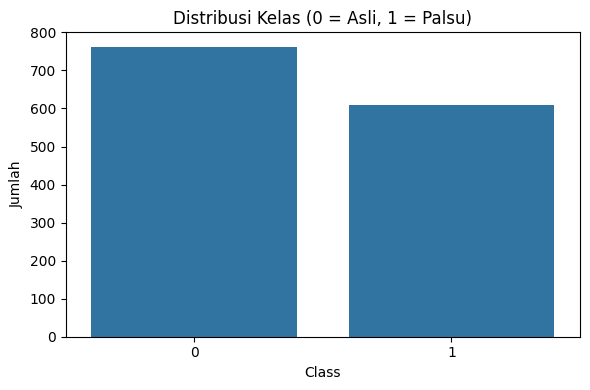

In [4]:
# visualisasi jumlah setiap kelas
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='class')
plt.title('Distribusi Kelas (0 = Asli, 1 = Palsu)')
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

In [5]:
# melihat tipe data dan apakah ada data yang kosong atau tidak
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
data.describe()

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# memisahkan fitur dan target (kelas)
X = data.drop('class', axis=1)
y = data['class']

In [8]:
# menormalkan data sebelum menerapkan PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
print(X_scaled)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]


#### Menerapkan PCA

In [10]:
# menginisialisasikan PCA dan mereduksi fitur menjadi 2d 
pca = PCA(n_components=2)
dataPCA = pca.fit_transform(X_scaled)

In [11]:
dataPCA

array([[ 1.47280494,  1.16391668],
       [ 1.63944068,  1.09381204],
       [-0.51391884,  1.32487953],
       ...,
       [-4.04932734, -2.03602288],
       [-3.01961738, -1.39214023],
       [-1.17058249, -0.09103094]])

In [12]:
# menjadikan fitur baru hasil setelah PCA menjadi dataframe
principalDf = pd.DataFrame(data = dataPCA, columns = ['PC1', 'PC2'])
# menggabungkan fitur baru dengan data target atau kelas
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,PC1,PC2,class
0,1.472805,1.163917,0
1,1.639441,1.093812,0
2,-0.513919,1.324880,0
3,2.310952,0.202514,0
4,-1.193416,-0.024654,0
...,...,...,...
1367,0.221995,0.290458,1
1368,-1.909395,-0.142149,1
1369,-4.049327,-2.036023,1
1370,-3.019617,-1.392140,1


### Plot hasil PCA

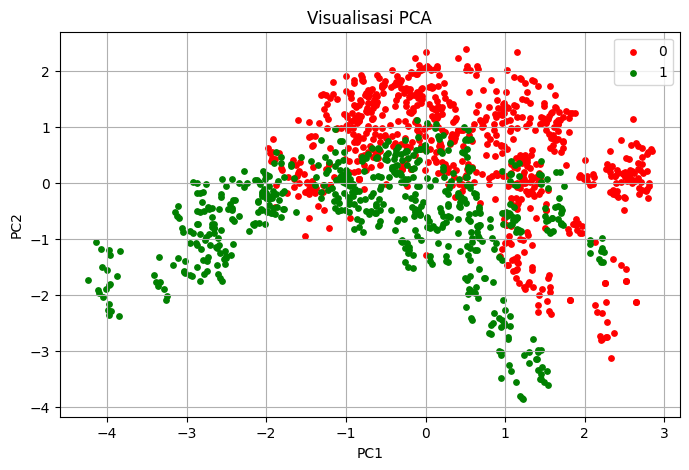

In [13]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title('Visualisasi PCA')

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c = color, s = 15)
ax.legend(targets)
ax.grid()

### visualisasi fitur

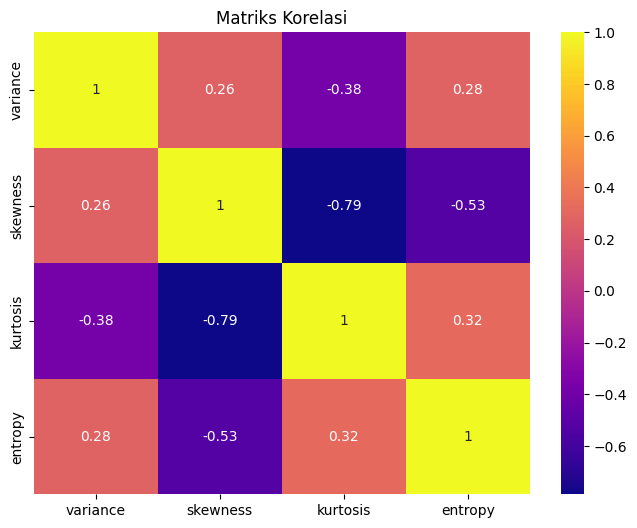

In [14]:
# melihat hubungan setiap fitur
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='plasma')
plt.title('Matriks Korelasi')
plt.show()

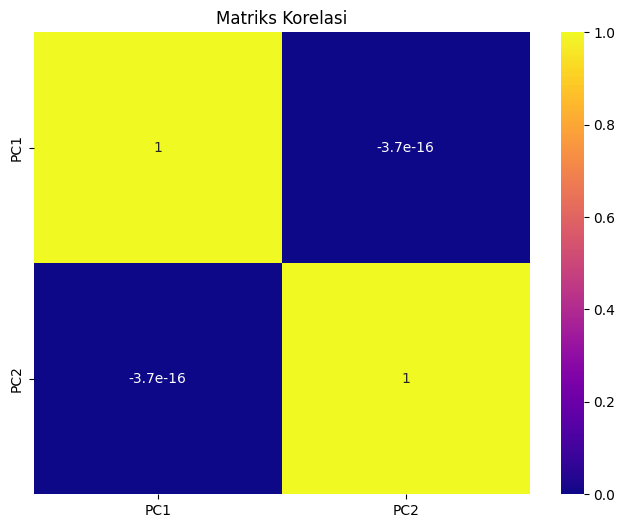

In [15]:
# visualisasi fitur baru
plt.figure(figsize=(8,6))
sns.heatmap(principalDf.corr(), annot=True, cmap='plasma')
plt.title('Matriks Korelasi')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8)

In [17]:
# smt = SMOTE()
# X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
predict_test = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predict_test))

Accuracy:  0.9854545454545455


In [20]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       0.98      0.98      0.98       133

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



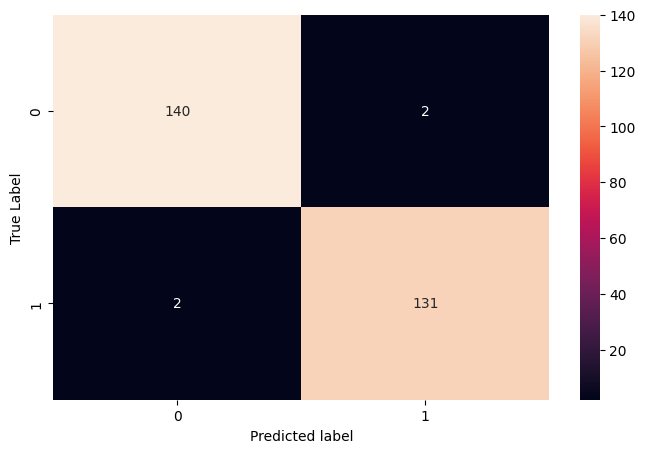

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()

In [22]:
# data PCA
X_train2, X_test2, y_train2, y_test2 = train_test_split(principalDf, y, train_size=0.8)

In [23]:
smt = SMOTE()
X_train_sm2, y_train_sm2 = smt.fit_resample(X_train2, y_train2)

In [24]:
modelPCA = DecisionTreeClassifier()
modelPCA.fit(X_train_sm2, y_train_sm2)

DecisionTreeClassifier()

In [25]:
predict_test2 = modelPCA.predict(X_test2)
print("Accuracy: ", accuracy_score(y_test2, predict_test2))

Accuracy:  0.8945454545454545


In [26]:
print(classification_report(y_test2, predict_test2))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       145
           1       0.91      0.86      0.89       130

    accuracy                           0.89       275
   macro avg       0.90      0.89      0.89       275
weighted avg       0.90      0.89      0.89       275



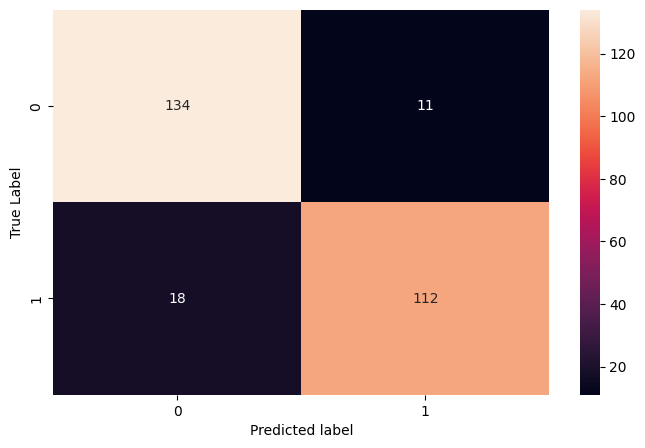

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test2, predict_test2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()

### Prediksi Data Baru

In [28]:
newPred1 = model.predict(np.array(X_scaled[1]).reshape(1, -1))
print(newPred1)

newPred2 = model.predict(np.array(X_scaled[1:10]))
print(newPred2) 

[0]
[0 0 0 0 0 0 0 0 0]


In [29]:
newPredPCA = modelPCA.predict(np.array(principalDf.iloc[1]).reshape(1, -1))
print(newPredPCA)

newPredPCA2 = modelPCA.predict(np.array(principalDf.iloc[1:10]))
print(newPredPCA2) 

[0]
[0 0 0 0 0 0 0 0 0]


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [30]:
data.head(10)

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0
